In [1]:
import ipyvuetify as v

In [2]:
b = v.Btn(children=['Button'])
b2 = v.Btn(children = ['Apple'], flat=True)
b3 = v.Btn(icon = True, children = [v.Icon(children=['cloud_download'])])
b4 = v.Btn(icon = True, slot='activator', children = [v.Icon(children=['cloud_download'])])

In [3]:
b.block = False
b.loading = False

In [4]:
def clicked(widget, event, data):
    print(widget)
    print(event)
    print(data)

In [5]:
b.on_event('click', clicked)
b2.href = "https://www.apple.com"

In [6]:
import base64
import pandas as pd
import numpy as np
import time
import webbrowser
df = pd.DataFrame(np.random.rand(1000,25))

In [7]:
csv = df.to_csv()
b64 = base64.b64encode(csv.encode())
payload = b64.decode()
href = f'data:text/csv;base64,{payload}'
b3.href = href

In [8]:
def send_to_excel(widget, event, data):
    widget.loading = True
    df.to_excel('/tmp/data.xlsx')
    url = 'file:///tmp/data.xlsx'
    webbrowser.open(url)
    time.sleep(2)
    widget.loading = False

b4.on_event('click', send_to_excel)

In [9]:
# wrap in a Layout, otherwise it fills the space
v.Layout(children=[
    b,
    b2,
    v.Tooltip(bottom=True, children=[
        b4,
        'Download to Excel'
    ])
])

Layout(children=[Btn(block=False, children=['Button'], loading=False), Btn(children=['Apple'], flat=True, href…

In [46]:
v.Card(elevation=10, ripple=True, children=[b], dark=True, flat=False)

Card(children=[Btn(block=False, children=['Button'], loading=False)], dark=True, elevation=10.0, flat=False, r…

In [43]:
??v.Card

# bqplot

In [16]:
# add a bqplot
from bqplot import pyplot as plt
import numpy as np

In [23]:
plt.clear()
plt.figure(1, title='')
n = 200
x = np.linspace(0.0, 10.0, n)
y = np.cumsum(np.random.randn(n))
plt.plot(x, y)
plt.show(display_toolbar=False)

Figure(axes=[Axis(scale=LinearScale()), Axis(orientation='vertical', scale=LinearScale())], fig_margin={'top':…

# seaborn plot

In [10]:
# add a seaborn plot, does it fill the card?
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
#!pip install --upgrade seaborn

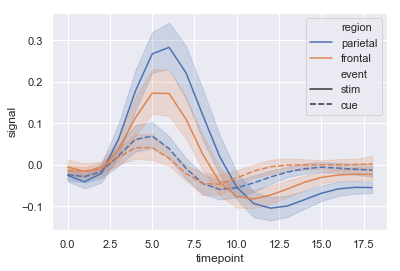

In [12]:
sns.set(style="darkgrid")

# Load an example dataset with long-form data
fmri = sns.load_dataset("fmri")

# Plot the responses for different events and regions
fig = sns.lineplot(x="timepoint", y="signal",
             hue="region", style="event",
             data=fmri)
plt.savefig('/tmp/output.jpg', format='jpg')

In [13]:
#v.Img(src ='https://picsum.photos/id/11/500/300' )
v.Img(src ='file:///tmp/output.jpg')

Img(src='file:///tmp/output.jpg')

![](img src='file:///tmp/output.jpg')

In [14]:
from IPython.display import Image
a = Image(filename='/root/Images/output.jpg')

FileNotFoundError: [Errno 2] No such file or directory: '/root/Images/output.jpg'

<img src='file:///tmp/output.jpg'>

In [ ]:
toggle_single = v.BtnToggle(v_model=2, class_='mr-3', children=[
    v.Btn(flat=True, children=[v.Icon(children=['format_align_left'])]),
    v.Btn(flat=True, children=[v.Icon(children=['format_align_center'])]),
    v.Btn(flat=True, children=[v.Icon(children=['format_align_right'])]),
    v.Btn(flat=True, children=[v.Icon(children=['format_align_justify'])]),
])
toggle_single

In [18]:
# add a v-data-table with filter and download buttons :-)

In [63]:
import ipyvuetify as v
from traitlets import (Unicode, List)
import pandas as pd

df = pd.DataFrame([['Tom', 10], ['Nick', 15], ['Juli', 14]], columns = ['Name', 'Age'])
df

class MyDataTable(v.VuetifyTemplate):
    headers = List([
        {'text': 'Name', 'sortable':  False, 'value': 'Name'},
        {'text': 'Age', 'value': 'Age', 'align': 'right'}
    ]).tag(sync=True)

    items = List(df.to_dict(orient='records')).tag(sync=True)

    template = Unicode('''
        <v-data-table
            :headers="headers"
            :items="items"
            class="elevation-1"
        >
            <template v-slot:items="props">
                <td>{{ props.item.Name }}</td>
                <td class="text-xs-right">{{ props.item.Age }}</td>
            </template>
        </v-data-table>
    ''').tag(sync=True)

MyDataTable()

MyDataTable(headers=[{'text': 'Name', 'sortable': False, 'value': 'Name'}, {'text': 'Age', 'value': 'Age', 'al…

In [60]:
class MyCard(v.VuetifyTemplate):
    my_text = "Hello Jonathan"
    
    template = Unicode('''
        <template>
  <v-layout>
    <v-flex xs12 sm6 offset-sm3>
      <v-card>
        <v-img
          src="https://cdn.vuetifyjs.com/images/cards/desert.jpg"
          aspect-ratio="2.75"
        ></v-img>

        <v-card-title primary-title>
          <div>
            <h3 class="headline mb-0">Kangaroo Valley Safari</h3>
            <div> '''+my_text+''' </div>
          </div>
        </v-card-title>

        <v-card-actions>
          <v-btn flat color="orange">Share</v-btn>
          <v-btn flat color="orange">Explore</v-btn>
        </v-card-actions>
      </v-card>
    </v-flex>
  </v-layout>
</template>
    ''').tag(sync=True)

MyCard()

MyCard()